In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [69]:
df = df.set_index('date')
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


In [70]:
df = df[(df['value']>df['value'].quantile(0.025)) &(df['value']<df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
2016-06-07,18335
2016-06-08,18072
2016-06-09,18139
2016-06-14,19395


In [71]:
df.index = pd.to_datetime(df.index)

Text(0, 0.5, 'Page Views')

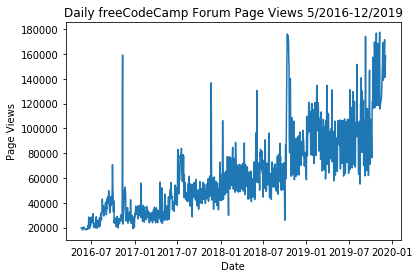

In [73]:
# df
# x = df.index
# y = df['value']

# fig = sns.lineplot(data = df, x = x, y = y, color='red').set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

# fig, ax = plt.subplots()
# ax = sns.lineplot(data=pd.Series(df['value']), legend=False, color='red')

fig = plt.figure()
plt.plot(df.index, df['value'])
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

In [77]:
import numpy as np
df_bar = df.copy()
df_bar["month"] = df_bar.index.month
df_bar["year"] = df_bar.index.year
cbar = df_bar.groupby([df.index.year, df.index.month],)['value'].agg(np.mean).rename_axis(['year', 'month'])
cbar = cbar.reset_index()
cbar

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [79]:
df_piv = pd.pivot_table(cbar, values='value', index='year', columns='month')

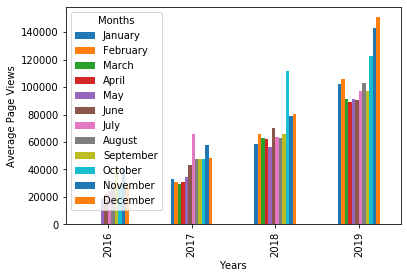

In [90]:
# fig = plt.figure()
# df_piv.plot(kind='bar')
# # plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# plt.xlabel('Years')
# plt.ylabel('Average Page Views')
# plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')

ax = df_piv.plot(kind='bar')
fig = ax.get_figure()
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

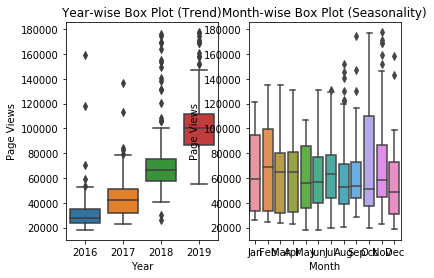

In [87]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig,axis = plt.subplots(1,2)
sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axis[0]).set(xlabel='Year', ylabel='Page Views')
sns.boxplot(x = df_box['month'], y = df_box['value'],order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], ax = axis[1]).set(xlabel='Month', ylabel='Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')

In [85]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun
7,2016-06-09,18139,2016,Jun
8,2016-06-14,19395,2016,Jun
9,2016-06-15,18584,2016,Jun
